In [63]:
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
import numpy as np

import os

In [53]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

#random_seed = 1
#torch.backends.cudnn.enabled = False
#torch.manual_seed(random_seed)

In [54]:
#transforms.RandomAffine(degrees=60, translate=(0.2, 0.2), scale=(0.5, 2.),
#                                               shear=None, resample=0, fillcolor=0),
transformation_list = [transforms.RandomAffine(degrees=60, translate=(0.2, 0.2), scale=(0.5, 2.),
                                                                      shear=None, resample=0, fillcolor=0),
                       transforms.ToTensor(),
                       transforms.Normalize((0.5,), (0.5,))]

transform = transforms.Compose(transformation_list)

#batch_size_train = 6


trainset = torchvision.datasets.MNIST(root='./data-mnist', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size_train,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data-mnist', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size_test,
                                         shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

You can visualize some of the pre-processed images here (This is optional and only for your own reference).
    9     0     4     4     4


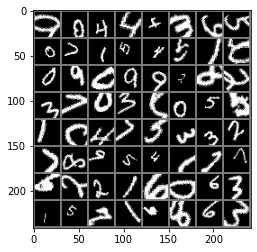

In [55]:
message = 'You can visualize some of the pre-processed images here (This is optional and only for your own reference).'
print(message)

# your code here
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(5)))

In [56]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

net = Net()

In [57]:
optimizer = optim.SGD(net.parameters(), lr=learning_rate,
                      momentum=momentum)

In [58]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(trainloader.dataset) for i in range(n_epochs + 1)]

In [59]:
def train(epoch):
  net.train()
  for batch_idx, (data, target) in enumerate(trainloader):
    optimizer.zero_grad()
    output = net(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(trainloader.dataset),
        100. * batch_idx / len(trainloader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(trainloader.dataset)))
      torch.save(net.state_dict(), './mnist_net.pth')
      torch.save(optimizer.state_dict(), './mnist_net_optimizer.pth')

In [60]:
def test():
  net.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in testloader:
      output = net(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(testloader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(testloader.dataset),
    100. * correct / len(testloader.dataset)))

In [61]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

c:\users\alejanpi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
c:\users\alejanpi\appdata\local\programs\python\python37\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3050, Accuracy: 961/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302495
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.319488
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.320309
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.289237
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.289644
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.329477
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.305635
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.290770
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.308897
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.295977
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.296221
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.297597
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.306388
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.294078
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.283799
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.304006
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.305542
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.291553
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.293218
Train Epoch: 1 [12160/

In [62]:
assert 'Net' in globals().keys(), 'The Net class was not defined earlier. ' + \
                                 'Make sure you read and follow the instructions provided as Important Notes' + \
                                 '(especially, the "Model Class Naming" part).'

mnist_net_path = './mnist_net.pth'

assert os.path.exists(mnist_net_path), 'You have not stored the trained model properly. ' + \
                                      'Make sure you read and follow the instructions provided as Important Notes.'

assert os.path.getsize(mnist_net_path) < 1000000, 'The size of your trained model exceeds 1 MB.'

if 'net' in globals():
    del net
net = Net()
net.load_state_dict(torch.load(mnist_net_path))
net = net.eval()

# Disclaimer: Most of the following code was adopted from Pytorch's Documentation and Examples
# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

transformation_list = [transforms.RandomAffine(degrees=60, translate=(0.2, 0.2), scale=(0.5, 2.),
                                               shear=None, resample=0, fillcolor=0),
                       transforms.ToTensor(),
                       transforms.Normalize((0.5,), (0.5,))]

test_pre_tranformation = transforms.Compose(transformation_list)

mnist_root = './data-mnist'
testset = torchvision.datasets.MNIST(root=mnist_root, train=False,
                                     download=False, transform=test_pre_tranformation)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=1)


class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
print('----------')
print(f'Overall Testing Accuracy: {100. * sum(class_correct) / sum(class_total)} %%')

c:\users\alejanpi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of     0 : 52 %
Accuracy of     1 : 96 %
Accuracy of     2 : 21 %
Accuracy of     3 : 18 %
Accuracy of     4 : 23 %
Accuracy of     5 :  8 %
Accuracy of     6 : 57 %
Accuracy of     7 : 47 %
Accuracy of     8 : 30 %
Accuracy of     9 : 35 %
----------
Overall Testing Accuracy: 40.15 %%
